# p1. Regression


- 기수:12기

- 이름: 김지은

- 작성자: 9기 이승원


_해당 실습 자료는 23-2 응용통계학과 김현중 교수님의 [데이터마이닝]의 수업자료와 해당 수업에서 본 출제자가 진행한 프로젝트를 기반으로 만들었음을 밝힙니다._


### 01. Setting


In [ ]:
import pandas as pd
import numpy as np

In [ ]:
df = pd.read_excel("/content/drive/MyDrive/bicycle_data.xlsx")
df.head()

행정동   이용건수     행정동코드  자치구  대여소개수       이용거리(M)  이용시간(분)  LCD_거치_대수  \
0  청운효자동  11755  11110515  종로구      3  2.904426e+07   284027          5   
1    사직동  58976  11110530  종로구     12  1.243033e+08  1195279         99   
2    삼청동  15960  11110540  종로구      5  3.520926e+07   368791         23   
3    부암동   4353  11110550  종로구      5  1.896218e+07   126968         23   
4    평창동   3810  11110560  종로구      5  1.410898e+07    94067         15   

   QR_거치_대수  상권_수  ...     여자20s생활인구     여자30s생활인구     여자40s생활인구  \
0        59     5  ...  2.885425e+06  3.143521e+06  3.745018e+06   
1       139     6  ...  5.133218e+06  6.282004e+06  5.561868e+06   
2        38     1  ...  1.157874e+06  1.197700e+06  1.266266e+06   
3        26     5  ...  2.305686e+06  1.908983e+06  2.804853e+06   
4        23     3  ...  1.935554e+06  2.306512e+06  3.250538e+06   

      여자50s생활인구     여자60s생활인구   여자70s이상생활인구  아파트_단지_수  아파트_평균_시가  길단위유동인구  \
0  3.170072e+06  2.157854e+06  2.640629e+06       323  276146690    14261   
1  4.041477e+06  2.650009e+06  2.740232e+06        89  371237211    34035   
2  9.427540e+05  7.849797e+05  7.954017e+05         9  401044841     6745   
3  2.466070e+06  1.871393e+06  2.216136e+06       189  259634651     5001   
4  3.803050e+06  3.117086e+06  3.559939e+06       294  480839259      878   

   직장인구  
0    41  
1   413  
2    40  
3    18  
4    26  

[5 rows x 76 columns]

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df.shape

(424, 76)

### 02. Linear Regression


#### 02-1. Data Preprocessing


우선, 분석에 필요하지 않은 열을 제거한다. (독립변수의 임의 제거가 아닌, 애초에 분석에 불필요한 정보를 제거한다.)


In [ ]:
df1 = df.drop(['행정동', '행정동코드', '자치구', '대여소개수', '이용거리(M)', '이용시간(분)', 'LCD_거치_대수', 'QR_거치_대수'], axis=1)

# Check dropped columns
df1.columns

Index(['이용건수', '상권_수', '집객시설_수', '관공서_수', '은행_수', '총병원_수', '종합병원_수', '일반_병원_수',
       '약국_수', '유치원_수', '초중고등학교_수', '초등학교_수', '중학교_수', '고등학교_수', '대학교_수',
       '백화점_수', '슈퍼마켓_수', '극장_수', '숙박_시설_수', '0s_foreigner', '10s_foreigner',
       '20s_foreigner', '30s_foreigner', '40s_foreigner', '50s_foreigner',
       '60s_foreigner', '70s_foreigner', '80s_foreigner', '90s_foreigner',
       '100s_foreigner', '0s_korean', '10s_korean', '20s_korean', '30s_korean',
       '40s_korean', '50s_korean', '60s_korean', '70s_korean', '80s_korean',
       '90s_korean', '100s_korean', '총생활인구수', '대중교통_승차', '지하철_승차', '버스_승차',
       '대중교통_하차', '지하철_하차', '버스_하차', '남자0s생활인구', '남자10s생활인구', '남자20s생활인구',
       '남자30s생활인구', '남자40s생활인구', '남자50s생활인구', '남자60s생활인구', '남자70s이상생활인구',
       '여자0s생활인구', '여자10s생활인구', '여자20s생활인구', '여자30s생활인구', '여자40s생활인구',
       '여자50s생활인구', '여자60s생활인구', '여자70s이상생활인구', '아파트_단지_수', '아파트_평균_시가',
       '길단위유동인구', '직장인구'],
      dtype='object')

앞서 살펴보았듯, 각 변수들의 범위는 상당히 다르다.

회귀분석은 데이터의 단위 (범위)에 민감하기 때문에 Scaling이 필요하다.

<hr/>


In [ ]:
df1.head()

이용건수  상권_수  집객시설_수  관공서_수  은행_수  총병원_수  종합병원_수  일반_병원_수  약국_수  유치원_수  ...  \
0  11755     5      24      3     1      0       0        0     1      0  ...   
1  58976     6     200     12    22      0       0        0    20      0  ...   
2  15960     1      16      3     1      0       0        0     0      0  ...   
3   4353     5      46      3     2      0       0        0     2      0  ...   
4   3810     3      86      4     1      0       0        0     2      1  ...   

      여자20s생활인구     여자30s생활인구     여자40s생활인구     여자50s생활인구     여자60s생활인구  \
0  2.885425e+06  3.143521e+06  3.745018e+06  3.170072e+06  2.157854e+06   
1  5.133218e+06  6.282004e+06  5.561868e+06  4.041477e+06  2.650009e+06   
2  1.157874e+06  1.197700e+06  1.266266e+06  9.427540e+05  7.849797e+05   
3  2.305686e+06  1.908983e+06  2.804853e+06  2.466070e+06  1.871393e+06   
4  1.935554e+06  2.306512e+06  3.250538e+06  3.803050e+06  3.117086e+06   

    여자70s이상생활인구  아파트_단지_수  아파트_평균_시가  길단위유동인구  직장인구  
0  2.640629e+06       323  276146690    14261    41  
1  2.740232e+06        89  371237211    34035   413  
2  7.954017e+05         9  401044841     6745    40  
3  2.216136e+06       189  259634651     5001    18  
4  3.559939e+06       294  480839259      878    26  

[5 rows x 68 columns]

- **Point 1. Robust Scaler를 사용하는 이유는 해당 Method가 중앙값과 삽누위수 범위를 사용하므로 Outlier에 덜 민감하기 때문이다. 따라서 별도의 Outlier 처리를 포함하진 않는다.**

- **Point 2. OLS를 돌릴 때, 컬럼명이 숫자로 시작하면 오류가 뜬다. (출제자가 실제 회귀분석과제를 할 때 에러가 떠서 고생을 했던 기억이 있어 꼭 기억하면 좋겠다.)**


In [ ]:
from sklearn.preprocessing import RobustScaler

# 변형 객체 생성
robust_scaler = RobustScaler()

# 훈련데이터의 모수 분포 저장
robust_scaler.fit(df1)

# 훈련 데이터 스케일링
all_scaled = robust_scaler.transform(df1)
df2_scaled = pd.DataFrame(all_scaled, columns = df1.columns)

# OLS에 알맞게 컬럼명 변경 (원래 숫자로 되어 있던 컬럼명에 언더바를 추가해줌)
df2_scaled.columns = ['이용건수', '상권_수', '집객시설_수', '관공서_수', '은행_수', '총병원_수', '종합병원_수', '일반_병원_수',
       '약국_수', '유치원_수', '초중고등학교_수', '초등학교_수', '중학교_수', '고등학교_수', '대학교_수',
       '백화점_수', '슈퍼마켓_수', '극장_수', '숙박_시설_수', '_0s_foreigner', '_10s_foreigner',
       '_20s_foreigner', '_30s_foreigner', '_40s_foreigner', '_50s_foreigner',
       '_60s_foreigner', '_70s_foreigner', '_80s_foreigner', '_90s_foreigner',
       '_100s_foreigner', '_0s_korean', '_10s_korean', '_20s_korean', '_30s_korean',
       '_40s_korean', '_50s_korean', '_60s_korean', '_70s_korean', '_80s_korean',
       '_90s_korean', '_100s_korean', '총생활인구수', '대중교통_승차', '지하철_승차', '버스_승차',
       '대중교통_하차', '지하철_하차', '버스_하차', '남자0s생활인구', '남자10s생활인구', '남자20s생활인구',
       '남자30s생활인구', '남자40s생활인구', '남자50s생활인구', '남자60s생활인구', '남자70s이상생활인구',
       '여자0s생활인구', '여자10s생활인구', '여자20s생활인구', '여자30s생활인구', '여자40s생활인구',
       '여자50s생활인구', '여자60s생활인구', '여자70s이상생활인구', '아파트_단지_수', '아파트_평균_시가',
       '길단위유동인구', '직장인구']

In [ ]:
df2_scaled.head()

이용건수      상권_수    집객시설_수  관공서_수  은행_수  총병원_수  종합병원_수  일반_병원_수  \
0 -0.370264  0.333333 -0.422145    0.5  0.00    0.0     0.0      0.0   
1  1.192504  0.666667  2.013841    5.0  5.25    0.0     0.0      0.0   
2 -0.231101 -1.000000 -0.532872    0.5  0.00    0.0     0.0      0.0   
3 -0.615232  0.333333 -0.117647    0.5  0.25    0.0     0.0      0.0   
4 -0.633202 -0.333333  0.435986    1.0  0.00    0.0     0.0      0.0   

       약국_수  유치원_수  ...  여자20s생활인구  여자30s생활인구  여자40s생활인구  여자50s생활인구  \
0 -0.555556    0.0  ...  -0.186164  -0.188702   0.023044  -0.156918   
1  1.555556    0.0  ...   0.476562   0.844300   0.655541   0.240888   
2 -0.666667    0.0  ...  -0.695505  -0.829151  -0.839882  -1.173713   
3 -0.444444    0.0  ...  -0.357091  -0.595038  -0.304255  -0.478303   
4 -0.444444    1.0  ...  -0.466219  -0.464196  -0.149099   0.132043   

   여자60s생활인구  여자70s이상생활인구  아파트_단지_수  아파트_평균_시가   길단위유동인구      직장인구  
0  -0.370213    -0.254954  0.444662   0.046755 -0.752024  0.000000  
1  -0.086386    -0.200455 -0.472086   0.450052 -0.385100  5.975904  
2  -1.161956    -1.264595 -0.785504   0.576471 -0.891490 -0.016064  
3  -0.535416    -0.487221 -0.080313  -0.023275 -0.923851 -0.369478  
4   0.182979     0.248059  0.331048   0.914894 -1.000357 -0.240964  

[5 rows x 68 columns]

#### 02-2. Feature Selection


독립변수와 종속변수에 해당하는 변수들을 각각 할당한다.


In [ ]:
X = df2_scaled.drop('이용건수', axis=1)
y = df2_scaled['이용건수']

print(X)
print(y)

         상권_수    집객시설_수  관공서_수  은행_수  총병원_수  종합병원_수  일반_병원_수      약국_수  유치원_수  \
0    0.333333 -0.422145    0.5  0.00    0.0     0.0      0.0 -0.555556    0.0   
1    0.666667  2.013841    5.0  5.25    0.0     0.0      0.0  1.555556    0.0   
2   -1.000000 -0.532872    0.5  0.00    0.0     0.0      0.0 -0.666667    0.0   
3    0.333333 -0.117647    0.5  0.25    0.0     0.0      0.0 -0.444444    0.0   
4   -0.333333  0.435986    1.0  0.00    0.0     0.0      0.0 -0.444444    1.0   
..        ...       ...    ...   ...    ...     ...      ...       ...    ...   
419  0.333333  0.892734    1.0  1.00    0.0     0.0      0.0  0.777778    1.0   
420  1.333333  2.401384    2.0  2.00    5.0     1.0      4.0  3.222222    4.0   
421 -1.333333 -0.754325   -1.0 -0.25    0.0     0.0      0.0 -0.666667    0.0   
422  0.333333  0.020761    1.0  0.25    0.0     0.0      0.0 -0.111111    2.0   
423 -1.000000 -0.380623    1.0  0.00    0.0     0.0      0.0 -0.222222    0.0   

     초중고등학교_수  ...  여자20s생활

In [ ]:
import os
from google.colab import drive
drive.mount('/content/drive')

# Google Drive 내의 utils 디렉토리 내용 확인
utils_path = '/content/drive/MyDrive/utils'
print("utils 디렉토리 내용:", os.listdir(utils_path))

import sys
import os

# Google Drive의 utils 디렉토리를 sys.path에 추가
sys.path.append('/content/drive/MyDrive/utils')

# feature_selection 모듈 임포트 시도
try:
    import feature_selection as fsel
    print("feature_selection 모듈을 성공적으로 임포트했습니다.")
except ImportError as e:
    print(f"모듈 임포트에 실패했습니다: {e}")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
utils 디렉토리 내용: ['gof_logistic.py', 'feature_selection.py', '__pycache__']
feature_selection 모듈을 성공적으로 임포트했습니다.


파이썬에서는 자체적으로 feature selection module을 제공하지 않는다.

본 과제에서는 함께 제공한 _./src/feature_selection.py_ 를 사용하여 진행하도록 하겠다.


사용시 주의할 점은 다음과 같다.

- 1. 현재 분석이 Linear Regression이니 'linear' 선택
- 2. AIC를 기준으로 Feature를 선택할 것이기에 'aic' 선택


In [ ]:
#import utils.feature_selection as fsel
import feature_selection as fsel
# imoprt feature_selection import fsel -> if feature_selection.py at same directory

fsel.forwardSelection(X, y, model_type='linear', elimination_criteria='aic')

Character Variables (Dummies Generated, First Dummies Dropped): []


/content/drive/MyDrive/utils/feature_selection.py:144: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  pvals = pd.concat([pvals, pd.DataFrame([[j, model.pvalues[j]]], columns=["Cols", "Pval"])], ignore_index=True)
/content/drive/MyDrive/utils/feature_selection.py:144: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  pvals = pd.concat([pvals, pd.DataFrame([[j, model.pvalues[j]]], columns=["Cols", "Pval"])], ignore_index=True)


Entered : 남자40s생활인구 	AIC : 1280.964912822545
Entered : _30s_korean 	AIC : 1270.9460933043408


/content/drive/MyDrive/utils/feature_selection.py:144: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  pvals = pd.concat([pvals, pd.DataFrame([[j, model.pvalues[j]]], columns=["Cols", "Pval"])], ignore_index=True)
/content/drive/MyDrive/utils/feature_selection.py:144: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  pvals = pd.concat([pvals, pd.DataFrame([[j, model.pvalues[j]]], columns=["Cols", "Pval"])], ignore_index=True)


Entered : 아파트_단지_수 	AIC : 1244.1841297555256
Entered : 길단위유동인구 	AIC : 1239.2670646825086


/content/drive/MyDrive/utils/feature_selection.py:144: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  pvals = pd.concat([pvals, pd.DataFrame([[j, model.pvalues[j]]], columns=["Cols", "Pval"])], ignore_index=True)
/content/drive/MyDrive/utils/feature_selection.py:144: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  pvals = pd.concat([pvals, pd.DataFrame([[j, model.pvalues[j]]], columns=["Cols", "Pval"])], ignore_index=True)


Entered : 초등학교_수 	AIC : 1234.87268860349
Entered : 직장인구 	AIC : 1230.9220038536073


/content/drive/MyDrive/utils/feature_selection.py:144: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  pvals = pd.concat([pvals, pd.DataFrame([[j, model.pvalues[j]]], columns=["Cols", "Pval"])], ignore_index=True)
/content/drive/MyDrive/utils/feature_selection.py:144: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  pvals = pd.concat([pvals, pd.DataFrame([[j, model.pvalues[j]]], columns=["Cols", "Pval"])], ignore_index=True)


Entered : 지하철_하차 	AIC : 1228.155526320979
Break : Significance Level
                            OLS Regression Results                            
Dep. Variable:                   이용건수   R-squared:                       0.386
Model:                            OLS   Adj. R-squared:                  0.375
Method:                 Least Squares   F-statistic:                     37.31
Date:                Thu, 08 Aug 2024   Prob (F-statistic):           1.75e-40
Time:                        07:55:32   Log-Likelihood:                -606.08
No. Observations:                 424   AIC:                             1228.
Df Residuals:                     416   BIC:                             1261.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------

['intercept',
 '남자40s생활인구',
 '_30s_korean',
 '아파트_단지_수',
 '길단위유동인구',
 '초등학교_수',
 '직장인구',
 '지하철_하차']

앞선 Feature Selection을 통해 선택된 변수들을 대사응로, 다중공선성을 만족하는지 확인한다.

다중공선성을 만족하는 변수들의 조합으로 선형 회귀 분석을 진행한다.

- 다중공선성 판별 기준: VIF값 10 이하


In [ ]:
# feature selection을 통해 선택된 변수들을 리스트 형태로 입력!

selected_cols = ['남자40s생활인구',
 '_30s_korean',
 '아파트_단지_수',
 '길단위유동인구',
 '초등학교_수',
 '직장인구',
 '지하철_하차']

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# VIF 데이터프레임 초기화
vif_data = df2_scaled[selected_cols].copy()  # X를 복사하여 사용합니다.

# VIF 계산
vif_data['Intercept'] = 1  # 상수항을 위한 Intercept 추가
vif_series = pd.Series([variance_inflation_factor(vif_data.values, i) for i in range(vif_data.shape[1])], index=vif_data.columns)

vif_df = pd.DataFrame(vif_series)
vif_df = vif_df.reset_index()
vif_df.columns = ['col', 'vif']
vif_df

# VIF 출력
print(vif_series)

# VIF 10 이상 삭제
selected_cols = []
for i in range(len(vif_df)):
    if vif_df['vif'][i] < 10:
        selected_cols.append(vif_df['col'][i])

selected_cols.remove('Intercept')
selected_cols

남자40s생활인구      2.612474
_30s_korean    1.970809
아파트_단지_수       1.338337
길단위유동인구        1.042099
초등학교_수         1.042781
직장인구           1.444073
지하철_하차         1.753606
Intercept      1.327840
dtype: float64


['남자40s생활인구', '_30s_korean', '아파트_단지_수', '길단위유동인구', '초등학교_수', '직장인구', '지하철_하차']

In [ ]:
import statsmodels.formula.api as smf

model = smf.ols(formula = "이용건수~ " + "+".join(selected_cols).replace(" ", "_"),
                 data=df2_scaled)
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   이용건수   R-squared:                       0.386
Model:                            OLS   Adj. R-squared:                  0.375
Method:                 Least Squares   F-statistic:                     37.31
Date:                Thu, 08 Aug 2024   Prob (F-statistic):           1.75e-40
Time:                        07:56:32   Log-Likelihood:                -606.08
No. Observations:                 424   AIC:                             1228.
Df Residuals:                     416   BIC:                             1261.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       0.1797      0.057      3.148      0.002       0.067       0.292
남자40s생활인구       0.4433      0.071      6.228      0.000       0.303       0.583
_30s_korean     0.4910      0.090      5.451      0.000       0.314       0.668
아파트_단지_수       -0.3688      0.072     -5.098      0.000      -0.511      -0.227
길단위유동인구        -0.1829      0.067     -2.712      0.007      -0.316      -0.050
초등학교_수          0.7257      0.273      2.662      0.008       0.190       1.262
직장인구           -0.0668      0.024     -2.775      0.006      -0.114      -0.019
지하철_하차          0.1150      0.053      2.169      0.031       0.011       0.219
==============================================================================
Omnibus:                      386.066   Durbin-Watson:                   1.532
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            20893.959
Skew:                           3.582   Prob(JB):                         0.00
Kurtosis:                      36.636   Cond. No.                         15.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### 02-3. Evaluation


In [ ]:
# sklearn 패키지의 model_selection 모듈에서 train_test_split 함수를 사용

from sklearn.model_selection import train_test_split

train, test = train_test_split(df2_scaled, test_size=0.3, random_state=1)
print('train:', len(train), '| test:', len(test))

train: 296 | test: 128


In [ ]:
X_train = train.drop(['이용건수'], axis=1)
y_train = train['이용건수']
X_test = test.drop(['이용건수'], axis=1)
y_test = test['이용건수']

In [ ]:
from sklearn.metrics import r2_score as r2
from sklearn.metrics import mean_absolute_error as mae
from sklearn.metrics import mean_absolute_percentage_error as mape
from sklearn.metrics import mean_squared_error as mse

pred = result.predict(X_test)

In [ ]:
print(f'r2: {r2(y_test, pred)}')
print(f'mse: {mse(y_test, pred)}')
print(f'mae: {mae(y_test, pred)}')
print(f'mape: {mape(y_test, pred)}')

r2: 0.4645130532216033
mse: 1.5950294642500684
mae: 0.689016731517567
mape: 2.2034124083054976


#### 02-4. Regression


In [ ]:
import statsmodels.api as sm

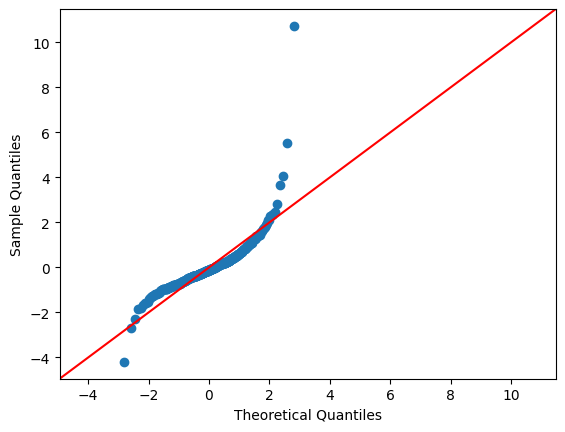

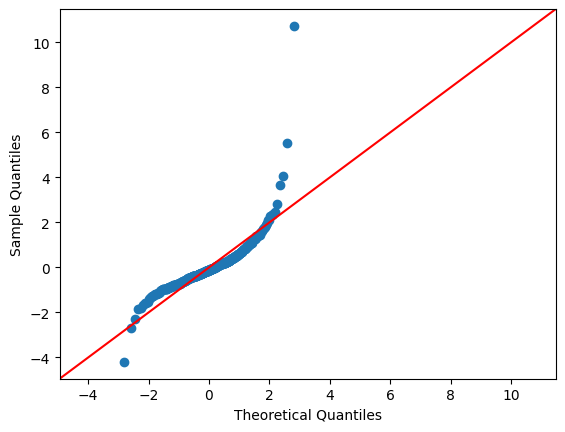

In [ ]:
import seaborn as sns
import matplotlib as plt

sm.qqplot(result.resid, fit=True, line='45')

<Axes: xlabel='fitted', ylabel='resid'>

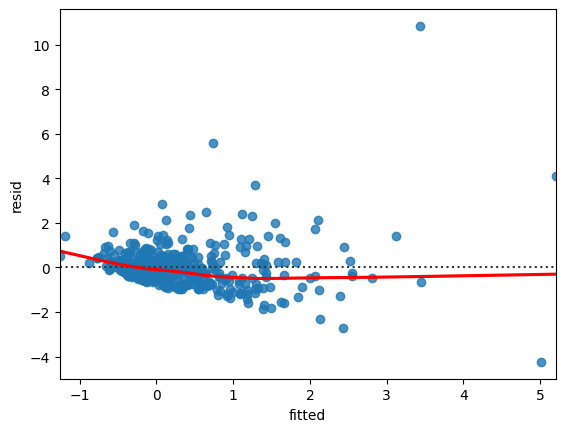

In [ ]:
eqvar = pd.DataFrame({'fitted': result.fittedvalues, 'resid' : result.resid })
sns.residplot(x='fitted', y='resid', data=eqvar, line_kws={'color':'red'}, lowess=True)

#### 02-5. TODO


**다양한 Scaling 방법과 Forward/Backward Selection 및 각종 Feature Selection 방법을 이용해 Linear Regression을 실습해보세요.**


In [ ]:
######## TODO ########

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.metrics import mean_squared_error

df3 = df.drop(['행정동', '행정동코드', '자치구', '대여소개수', '이용거리(M)', '이용시간(분)', 'LCD_거치_대수', 'QR_거치_대수'], axis=1)

# 1. 데이터 로드 및 준비

X = df3.drop('이용건수',axis=1)
y = df3['이용건수']

# 2. 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 3. 데이터 스케일링
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 4. 선형 회귀 모델
model = LinearRegression()

# 5. 전진 선택법
sfs = SequentialFeatureSelector(model, n_features_to_select='auto', direction='forward', cv=5)
sfs.fit(X_train_scaled, y_train)

# 선택된 피처
selected_features = X.columns[sfs.get_support()]

print(f"선택된 피처: {selected_features}")

# 선택된 피처로 새로운 데이터셋 생성
X_train_selected = X_train_scaled[:, sfs.get_support()]
X_test_selected = X_test_scaled[:, sfs.get_support()]

# 6. 모델 학습
model.fit(X_train_selected, y_train)

# 7. 예측 및 평가
y_pred = model.predict(X_test_selected)
mse = mean_squared_error(y_test, y_pred)
print(f"평균 제곱 오차 (MSE): {mse:.2f}")

# 전체 피처와 비교
full_model = LinearRegression()
full_model.fit(X_train_scaled, y_train)
full_y_pred = full_model.predict(X_test_scaled)
full_mse = mean_squared_error(y_test, full_y_pred)
print(f"전체 피처 사용 시 평균 제곱 오차 (MSE): {full_mse:.2f}")


######## TODO ########

선택된 피처: Index(['관공서_수', '은행_수', '유치원_수', '초중고등학교_수', '초등학교_수', '대학교_수', '백화점_수',
       '슈퍼마켓_수', '숙박_시설_수', '0s_foreigner', '10s_foreigner', '20s_foreigner',
       '40s_foreigner', '60s_foreigner', '80s_foreigner', '90s_foreigner',
       '100s_foreigner', '0s_korean', '10s_korean', '20s_korean', '50s_korean',
       '60s_korean', '70s_korean', '90s_korean', '100s_korean', '지하철_승차',
       '지하철_하차', '남자30s생활인구', '여자30s생활인구', '여자50s생활인구', '여자60s생활인구',
       '여자70s이상생활인구', '아파트_단지_수'],
      dtype='object')
평균 제곱 오차 (MSE): 726522182.26
전체 피처 사용 시 평균 제곱 오차 (MSE): 1063890728.46


### 03. Logistic Regression


In [ ]:
import pandas as pd

df_lr = pd.read_excel('./data/bicycle_data.xlsx')

In [ ]:
# Label it based on 0.5.
y_median = df['이용건수'].quantile(0.5)
df['y'] = df['이용건수'].apply(lambda x: 1 if x >= y_median else 0)

# 열 순서 재배치
df = df[['행정동', '이용건수', 'y', '대여소개수', '이용거리(M)', '이용시간(분)', 'LCD_거치_대수', 'QR_거치_대수',
       '상권_수', '집객시설_수', '관공서_수', '은행_수', '총병원_수', '종합병원_수', '일반_병원_수', '약국_수',
       '유치원_수', '초중고등학교_수', '초등학교_수', '중학교_수', '고등학교_수', '대학교_수', '백화점_수',
       '슈퍼마켓_수', '극장_수', '숙박_시설_수', '0s_foreigner', '10s_foreigner',
       '20s_foreigner', '30s_foreigner', '40s_foreigner', '50s_foreigner',
       '60s_foreigner', '70s_foreigner', '80s_foreigner', '90s_foreigner',
       '100s_foreigner', '0s_korean', '10s_korean', '20s_korean', '30s_korean',
       '40s_korean', '50s_korean', '60s_korean', '70s_korean', '80s_korean',
       '90s_korean', '100s_korean', '총생활인구수', '대중교통_승차', '지하철_승차', '버스_승차',
       '대중교통_하차', '지하철_하차', '버스_하차', '남자0s생활인구', '남자10s생활인구', '남자20s생활인구',
       '남자30s생활인구', '남자40s생활인구', '남자50s생활인구', '남자60s생활인구', '남자70s이상생활인구',
       '여자0s생활인구', '여자10s생활인구', '여자20s생활인구', '여자30s생활인구', '여자40s생활인구',
       '여자50s생활인구', '여자60s생활인구', '여자70s이상생활인구', '길단위유동인구', '직장인구']]

# 이 과정이 필요한 이유: logistic model 돌릴 때 숫자로 시작하거나, (~) 같은게 포함되어 있으면 분석이 제대로 안됨
df.columns = ['행정동', '이용건수', 'y', '대여소개수', '이용거리', '이용시간', 'LCD_거치_대수', 'QR_거치_대수',
       '상권_수', '집객시설_수', '관공서_수', '은행_수', '총병원_수', '종합병원_수', '일반_병원_수', '약국_수',
       '유치원_수', '초중고등학교_수', '초등학교_수', '중학교_수', '고등학교_수', '대학교_수', '백화점_수',
       '슈퍼마켓_수', '극장_수', '숙박_시설_수', '_0s_foreigner', '_10s_foreigner',
       '_20s_foreigner', '_30s_foreigner', '_40s_foreigner', '_50s_foreigner',
       '_60s_foreigner', '_70s_foreigner', '_80s_foreigner', '_90s_foreigner',
       '_100s_foreigner', '_0s_korean', '_10s_korean', '_20s_korean', '_30s_korean',
       '_40s_korean', '_50s_korean', '_60s_korean', '_70s_korean', '_80s_korean',
       '_90s_korean', '_100s_korean', '총생활인구수', '대중교통_승차', '지하철_승차', '버스_승차',
       '대중교통_하차', '지하철_하차', '버스_하차', '남자0s생활인구', '남자10s생활인구', '남자20s생활인구',
       '남자30s생활인구', '남자40s생활인구', '남자50s생활인구', '남자60s생활인구', '남자70s이상생활인구',
       '여자0s생활인구', '여자10s생활인구', '여자20s생활인구', '여자30s생활인구', '여자40s생활인구',
       '여자50s생활인구', '여자60s생활인구', '여자70s이상생활인구', '길단위유동인구', '직장인구']

#### 01. Modeling


In [ ]:
# X, y 나누기
X = df.drop(['행정동', '이용건수', 'y', '이용거리','이용시간','대여소개수'], axis=1)
y = df['y']

In [ ]:
# 변수 선택을 위한 AIC 최적화 함수: 전진선택
def forward_selection_AIC(X, y):
    features = X.columns
    selected_features = []
    best_aic = float('inf')

    for feature in features:
        model = sm.Logit(y, sm.add_constant(df[selected_features + [feature]]))
        result = model.fit()
        current_aic = result.aic

        if current_aic < best_aic:
            best_aic = current_aic
            selected_features.append(feature)

    return selected_features, best_aic

# 목표 변수와 데이터 프레임을 지정하여 변수 선택 수행
response_variable = 'y'
selected_features, best_aic = forward_selection_AIC(X, y)

# 결과 출력
print("Selected Features:", selected_features)
print("Best AIC:", best_aic)

#### 02. Model Fitting


In [ ]:
x_formula = '+'.join(selected_features)
x_formula = 'y~'+ x_formula
x_formula = x_formula.replace(" ", "")

model1 = smf.glm(formula = x_formula, data = df, family=sm.families.Binomial())
result1 = model1.fit()
result1.summary()

p-value가 0.05 이상이면 설명력을 갖는다고 봅니다.


In [ ]:
import utils.gof_logistic as gof

gof.HosmerLemeshow(result1, y)

오즈를 계산하면 다음과 같습니다.


In [ ]:
import numpy as np

odds = np.exp(result1.params)
odds